In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('bank.csv')

In [8]:
data.head(5)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,no,unknown,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,no,unknown,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,no,unknown,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,no,unknown,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,no,unknown,5,may,673,2,-1,0,yes


In [9]:
data.shape

(11162, 15)

In [10]:
data.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'loan',
       'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'deposit'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   balance    11162 non-null  int64 
 5   housing    11162 non-null  object
 6   loan       11162 non-null  object
 7   contact    11162 non-null  object
 8   day        11162 non-null  int64 
 9   month      11162 non-null  object
 10  duration   11162 non-null  int64 
 11  campaign   11162 non-null  int64 
 12  pdays      11162 non-null  int64 
 13  previous   11162 non-null  int64 
 14  deposit    11162 non-null  object
dtypes: int64(7), object(8)
memory usage: 1.3+ MB


In [35]:
numerical_cols = data.select_dtypes(include= ['int64', 'float']).columns.tolist()
categorical_cols = data.select_dtypes(include='object').columns.tolist()

In [34]:
print(f"numerical columns list: {numerical_cols}")
print(f"categorical columns list: {categorical_cols}")

numerical columns list: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
categorical columns list: ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'deposit']


In [44]:
null_counts = data.isnull().sum()
null_percentages = (null_counts / len(data)) * 100

# 3. Create summary table [cite: 27, 28, 29, 30]
missing_data = pd.DataFrame({
    'Column Name': null_counts.index,
    'Number of Nulls': null_counts.values,
    'Percentage of Nulls': null_percentages.values
})
print(missing_data)

   Column Name  Number of Nulls  Percentage of Nulls
0          age                0                  0.0
1          job                0                  0.0
2      marital                0                  0.0
3    education                0                  0.0
4      balance                0                  0.0
5      housing                0                  0.0
6         loan                0                  0.0
7      contact                0                  0.0
8          day                0                  0.0
9        month                0                  0.0
10    duration                0                  0.0
11    campaign                0                  0.0
12       pdays                0                  0.0
13    previous                0                  0.0
14     deposit                0                  0.0


##### method 1 : Use when a specific feature is missing a vast majority of its data (e.g., more than 40%)

##### Dropping columns is risky because it can lead to the loss of  critical information or features that might be the primary drivers of  target variable.

In [ ]:
data_dropping = data.loc[:, data.isnull().mean() < 0.40]

##### method 2 : Use when havinge a very large dataset and only a tiny percentage of rows contain missing values

In [ ]:
print("size before :", data.shape)

data_dropping = data.dropna()
print("size after :", data_dropping.shape)

size before : (11162, 15)
size after : (11162, 15)


##### method 3 : Use when cannot afford to lose any data points and want to maintain the original size of the dataset.

In [ ]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        data[col] = data[col].fillna(data[col].median()) 
        
    elif data[col].dtype == 'object':
        if not data[col].mode().empty:
            data[col] = data[col].fillna(data[col].mode()[0]) 

print(data.isnull().sum()) 

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
deposit      0
dtype: int64


### visualization

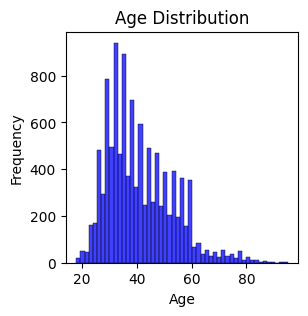

In [54]:
plt.figure(figsize= (3,3) )
sns.histplot(data['age'], color = 'blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

###### Interpretation: This (Age Distribution) plot shows that the bank targets a mature demographic, with the highest frequency of customers falling between ages 30 and 40

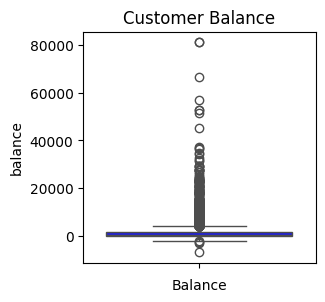

In [55]:
plt.figure(figsize=(3,3))
sns.boxplot(data["balance"], color = "blue")
plt.title("Customer Balance")
plt.xlabel("Balance")
plt.show()

###### Interpretation: The boxplot reveals that while the median balance is relatively low, there are several extreme outliers with very high account balances.

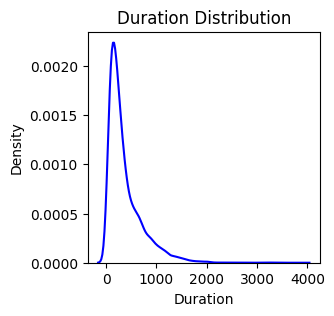

In [56]:
plt.figure(figsize=(3,3))
sns.kdeplot(data["duration"], color = "blue")
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.show()

###### Interpretation: The call duration is right-skewed, indicating that most marketing calls are brief, though a few extend significantly longer.

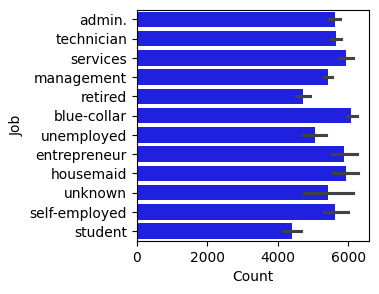

In [ ]:
plt.figure(figsize=(3,3))
sns.barplot(data["job"], color = "blue")
plt.title('Frequency of Job Types')
plt.xlabel("Count")
plt.ylabel("Job")
plt.show()

###### Interpretation: The "housemaid" and "blue-collar" job categories have the highest count, showing they are the bank’s most common customer types.

Text(0, 0.5, 'Deposit')

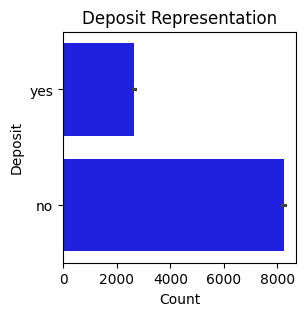

In [60]:
plt.figure(figsize=(3,3))
sns.barplot(data['deposit'], color = "blue")
plt.title("Deposit Representation")
plt.xlabel("Count")
plt.ylabel("Deposit")

###### Interpretation: This chart shows the distribution of the target variable, indicating that a smaller percentage of customers actually subscribed to a deposit 

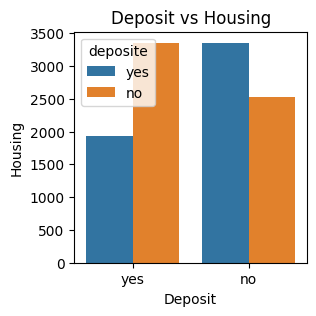

In [64]:
plt.figure(figsize=(3,3))
sns.countplot(x = 'housing', hue = 'deposit', data = data)
plt.title("Deposit vs Housing")
plt.xlabel("Deposit")
plt.ylabel("Housing")
plt.legend(title= 'deposite')
plt.show()

###### Interpretation: This plot suggests that customers without a housing loan may have a higher tendency to subscribe to a term deposit compared to those who already have a loan.

##### Questions Part6

#### 1. Which preprocessing method was most effective for this dataset?

#### Imputation (Method 3) is generally the most effective method for this dataset. Because bank datasets often contain valuable customer information in every row, Dropping Rows (Method 2) would result in a significant loss of data that could bias the results. By using the Median for numerical columns like balance and the Mode for categorical columns like job, we preserve the dataset's size while maintaining its statistical integrity.

##### 2. Which feature seems most related to deposit subscription?

##### The duration feature is typically the most related to deposit subscription. As seen in the visualizations, the length of the last contact call often has a strong positive correlation with a customer saying "yes" to a term deposit. Other influential features often include balance (financial stability) and housing (existing debt levels).

##### 3. What problems could appear if preprocessing is skipped?



##### - Model Failure: Many machine learning libraries cannot handle missing values (nulls) or categorical text directly, causing the code to crash.

##### - Inaccurate Insights: Outliers in columns like balance can heavily skew the mean and lead to misleading visualizations.

##### - Data Type Errors: If numerical columns like age are stored as objects (strings), you cannot perform mathematical operations or create histograms.

##### - Biased Results: Ignoring missing data or failing to handle imbalances can result in a model that makes poor or biased predictions